In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.stattools import adfuller
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y')
from statsmodels.tsa.stattools import acf, pacf
import itertools

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y')

In [3]:
df=pd.read_csv("DC_GrossStateProduct.csv", header=0, parse_dates=[0],index_col=0, date_parser=dateparse)

In [ ]:
#df.index=df.index.astype('object')

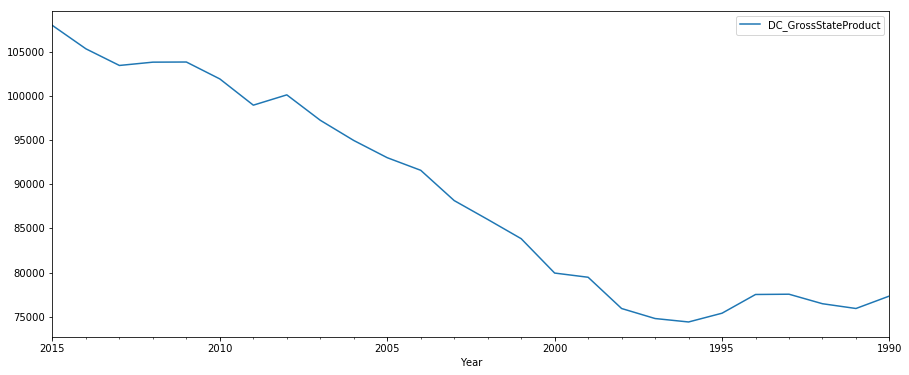

In [4]:
df.plot(figsize=(15, 6))
plt.show()

In [5]:
rolmean = pd.rolling_mean(df, window=5)

C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=5).mean()
  if __name__ == '__main__':


In [6]:
rolstd = pd.rolling_std(df, window=5)

C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=5).std()
  if __name__ == '__main__':


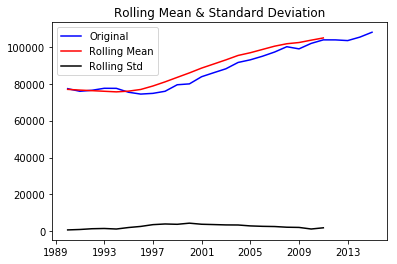

In [7]:
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Decomposition 

In [8]:
decomposition = seasonal_decompose(df)

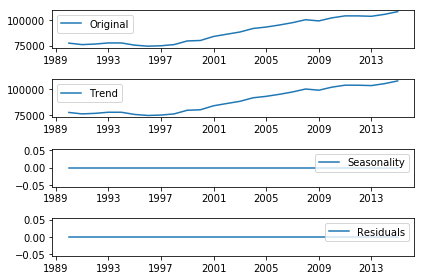

In [9]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Stationarity

In [10]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=5)
    rolstd = pd.rolling_std(timeseries, window=5)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.ix[:,0], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=5).mean()
C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=5).std()


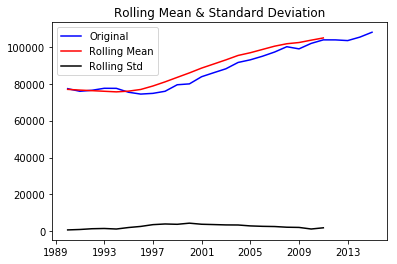

Results of Dickey-Fuller Test:
Test Statistic                 -1.743628
p-value                         0.408786
#Lags Used                      0.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [11]:
test_stationarity(df)

# Perform Log Transformations to stationarize the Time Series

In [12]:
df_log=np.log(df)

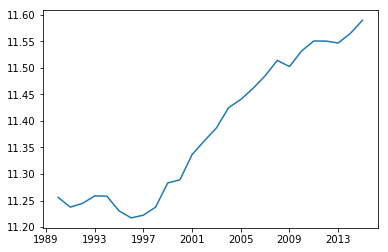

In [13]:
plt.plot(df_log)
plt.show()

C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=5).mean()
C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=5).std()


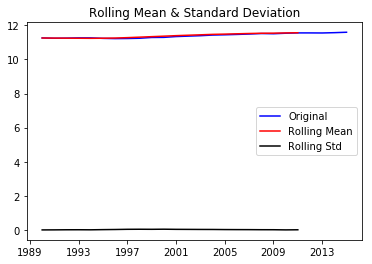

Results of Dickey-Fuller Test:
Test Statistic                 -1.469552
p-value                         0.548516
#Lags Used                      0.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [15]:
test_stationarity(df_log)

In [ ]:
#df_log_diff=df_log-df_log.shift()

In [ ]:
#df_log_diff.dropna(inplace=True)

In [ ]:
#test_stationarity(df_log_diff)

# Determine p,q from ACF and PACF plots

In [16]:
lag_acf = acf(df_log, nlags=10)
lag_pacf = pacf(df_log, nlags=10, method='ols')

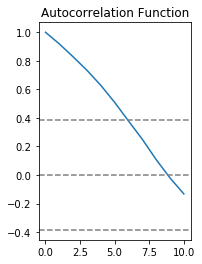

In [17]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

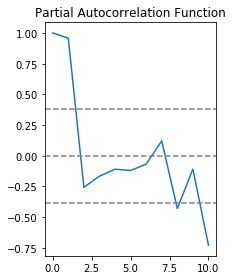

In [18]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

-28.2877152932


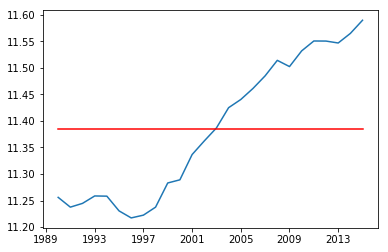

-56.57678820844812


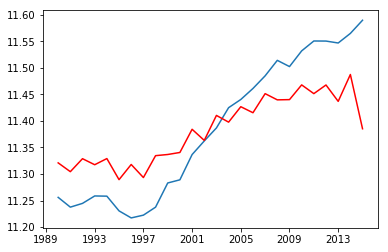

-112.53042919086691


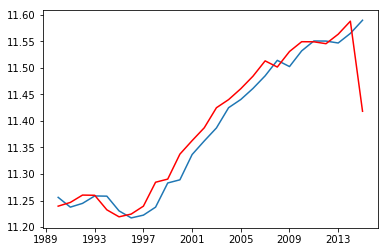

-115.29791531725714


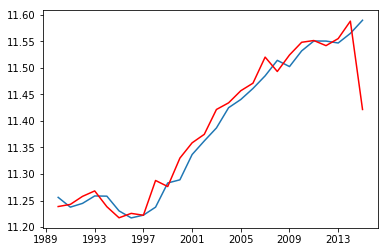

-118.62383060180046


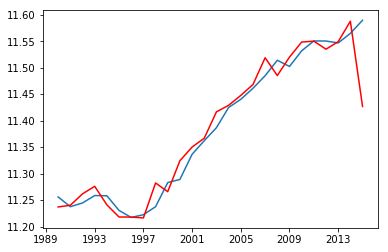

-124.913404392497


C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


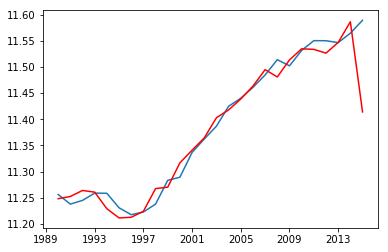

          AIC Modelname
0  -28.287715    (0, 0)
0  -56.576788    (0, 1)
0 -112.530429    (1, 0)
0 -115.297915    (1, 1)
0 -118.623831    (2, 0)
0 -124.913404    (2, 1)
Model selected:
(2, 1)


C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


-124.913404392497


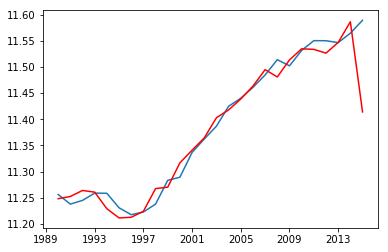

Forecasted values are:
[ 78370.18481487  79616.48722005  81069.3618327   82709.76442521
  84514.85618141]
Predicted existing values are:
Year
2015-01-01     90582.696720
2014-01-01    107633.067758
2013-01-01    103467.269367
2012-01-01    101366.050329
2011-01-01    102104.355030
2010-01-01    102211.838252
2009-01-01    100065.842324
2008-01-01     96852.794879
2007-01-01     98215.806603
2006-01-01     95179.047878
2005-01-01     92853.397813
2004-01-01     90929.470350
2003-01-01     89581.554167
2002-01-01     86190.277080
2001-01-01     84190.468075
2000-01-01     82171.614298
1999-01-01     78435.032989
1998-01-01     78225.614593
1997-01-01     74894.123491
1996-01-01     74045.209757
1995-01-01     73954.328378
1994-01-01     75262.694524
1993-01-01     77691.491344
1992-01-01     77943.478971
1991-01-01     77052.721962
1990-01-01     76722.763827
dtype: float64


In [21]:
def forecast(model,numSteps):
    #model.forecast(steps=numSteps)
    output = model.forecast(steps=numSteps)[0]
    output.tolist()
    output = np.exp(output)
    np.savetxt('ForecastedValues.csv', output, delimiter=",")
    print('Forecasted values are:')
    print(output)
    return output

def FittedValues(model):
    fittedVal=model.fittedvalues
    PredictedVal=np.exp(fittedVal)
    np.savetxt('PredictedValues.csv', PredictedVal, delimiter=",")
    print('Predicted existing values are:')
    return PredictedVal

def cal_aic_metric(modelname,model):
    global aic_metric
    AIC = model.aic
    aic_dict[modelname] = AIC
    df_error = pd.DataFrame({'Modelname':[modelname],'AIC':[AIC]})
    aic_metric = pd.concat([aic_metric,df_error])
    return aic_metric

def AR_Model(ts, param):
    
    model = tsa.ARMA(ts, order=param)
    results_AR = model.fit(disp=0)
    print(results_AR.aic)
    plt.plot(ts)
    plt.plot(results_AR.fittedvalues, color='red')
    plt.show()
    cal_aic_metric(param,results_AR)
    return results_AR

def chooseModel(df_log):
    p = range(0, 3)
    q = range(0,2)
    pq = list(itertools.product(p, q))
    for param in pq:
        results=AR_Model(df_log, param)
    print(aic_metric)
    aic_metric.to_csv('AICMetric.csv', sep=",")
    paramNew=aic_metric['Modelname'][aic_metric['AIC']==aic_metric['AIC'].min()]
    paramNew=paramNew[0]
    print('Model selected:')
    print(paramNew)
    results_AR_final=AR_Model(df_log, paramNew)
    forecast(results_AR_final, 5)
    print(FittedValues(results_AR_final))
    return results_AR_final

aic_metric = pd.DataFrame({'Modelname':[],'AIC':[]})
aic_dict = {}
chooseModel(df_log)

# Models

# AR Model

In [ ]:
model = ARIMA(df_log, order=(2, 0, 0))  
results_AR = model.fit(disp=0)  
ARAic=results_AR.aic

plt.plot(df_log)
plt.plot(results_AR.fittedvalues, color='red')
plt.show()
print('AIC: %.4f'% results_AR.aic)
print('RSS: %.4f'% sum((results_AR.fittedvalues-df_log.ix[:,0])**2))
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df_log)**2))

# MA Model

In [ ]:
model = ARIMA(df_log, order=(0, 0, 7))  
results_MA = model.fit(disp=-1)
MAAic=results_MA.aic
plt.plot(df_log)
plt.plot(results_MA.fittedvalues, color='red')
plt.show()
print('AIC: %.4f'% results_MA.aic)
print('RSS: %.4f'% sum((results_MA.fittedvalues-df_log.ix[:,0])**2))
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df_log)**2))

# Combined Model

In [ ]:
model = ARIMA(df_log, order=(1, 0, 7))  
results_ARIMA = model.fit(disp=-1)  
ARIMAAic=results_ARIMA.aic

plt.plot(df_log)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.show()
print('AIC: %.4f'% results_ARIMA.aic)
print('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_log.ix[:,0])**2))

In [ ]:
np.exp(results_AR.predict(4,5, dynamic=True))
#out

In [ ]:
result=sm.tsa.ARMA(df_log, (2,0))
result=result.fit()
print(result.aic)
np.exp(result.predict(4, 4))

# Choose the Model with low AIC

In [ ]:
if (ARAic < MAAic) & (ARAic < ARIMAAic):
    out=results_AR.forecast(steps=10)[0]
    print('AR selected')
elif (MAAic < ARAic) & (MAAic < ARIMAAic):
    out=results_MA.forecast(steps=2)[0]
    print('MA selected')
elif (ARIMAAic < ARAic) & (ARIMAAic < MAAic):
    out=results_ARIMA.forecast(steps=2)[0]
    print('ARIMA selected')
#list(reversed(out))
listOne=out.tolist()
listOne=listOne[::-1]
listOne=np.exp(listOne)
list1=listOne.tolist()
dfList=df.ix[:,0].tolist()
newList=list1+dfList
newList

In [ ]:
df_new=pd.DataFrame(data=newList)

In [ ]:
index=df.index

In [ ]:
dataframe1=pd.read_csv('DC_UnemploymentRate.csv', header=0)

In [ ]:
dataframe1.head()

In [ ]:
index_vals = pd.to_datetime(dataframe1.ix[:,0], format='%Y')
dataframe1 = dataframe1.set_index(index_vals)
dataframe1 = dataframe1.sort_index()
dataframe1.drop('Year', axis=1, inplace=True)
    
    # dateparse = lambda dates: pd.datetime.strptime(dates, '%Y')
    
    
    # dataframe1 = dataframe1.set_index(dataframe1.ix[:,0])
    # dataframe1.drop('Column 0', axis=1, inplace=True)
    # dataframe1 = dataframe1.sort_index()
ts_log = dataframe1.apply(lambda x: np.log(x))
model = ARIMA(ts_log, order=(2, 0, 3))
print(ts_log)
results_ARIMA = model.fit(disp=-1)
print(results_ARIMA.fittedvalues)
forcasted_values = np.exp(np.array(results_ARIMA.fittedvalues.values.tolist()))
print(forcasted_values)